## Analysis for NAS-based results

In [1]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# parse the results of ENAS

result_path = "stdout"
results = open(result_path, 'r').read().strip()
lines = results.split('\n')

val_accs = [float(k.split(':')[1]) for k in re.findall('valid_accuracy: .*', results)]
val_accs_raw = [float(k.split('=')[1]) for k in re.findall('val_acc=.*', results)]

In [3]:
# count the moving average reward

window_size = 20  # avg window size
mov_avg_rwd = []
max_rwd = []
min_rwd = []
for i in range(310-window_size):
    mov_avg_rwd.append(np.mean(val_accs[i:i+window_size])*100)
for i in range(310-window_size):
    max_rwd.append(np.max(val_accs[i:i+window_size])*100)  # count max acc
for i in range(310-window_size):
    min_rwd.append(np.min(val_accs[i:i+window_size])*100)  # count min acc

Text(153, 17, 'warm start 3')

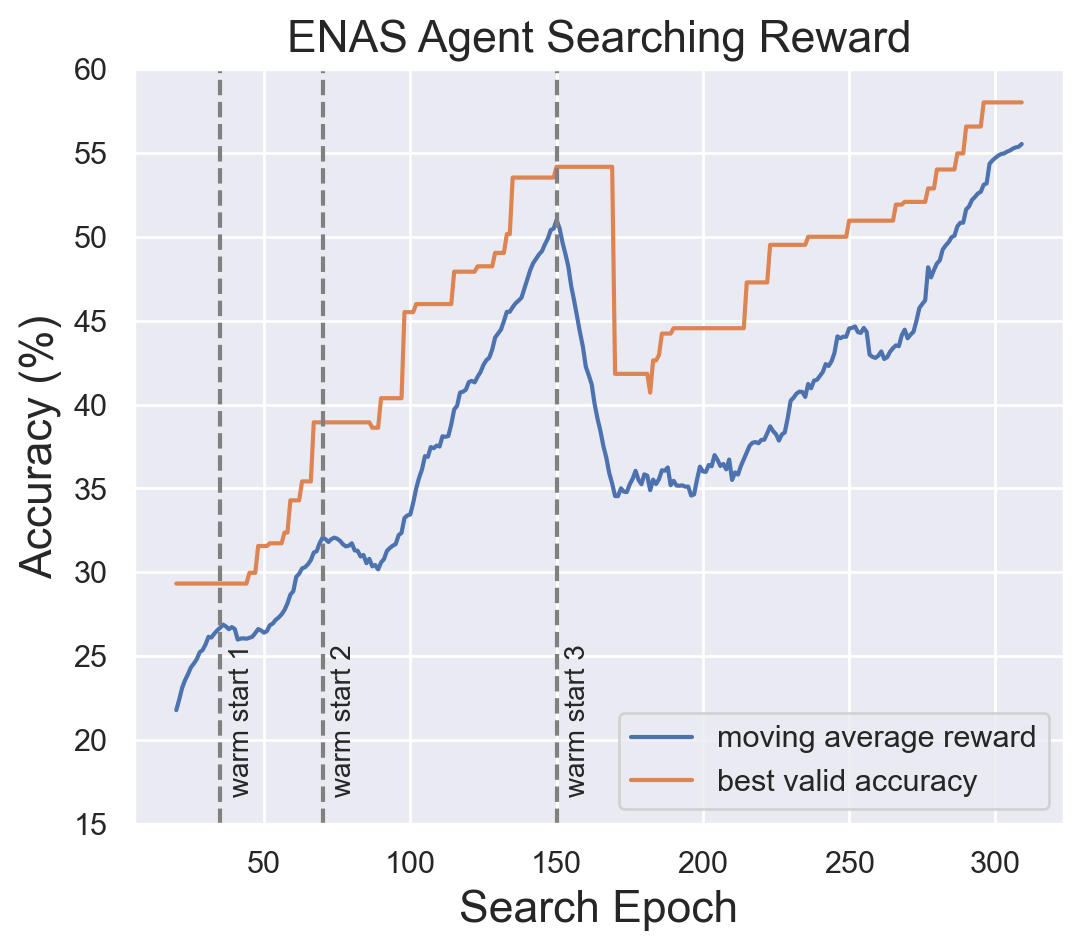

In [4]:
# plot the moving average reward results

sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,5), dpi=200)
plt.xticks(rotation=0)
plt.xlabel('Search Epoch', size=16)
plt.ylabel('Accuracy (%)', size=16)
plt.ylim(15, 60)
plt.title('ENAS Agent Searching Reward', size=16)

g = sns.lineplot(x=range(window_size, len(mov_avg_rwd)+20),y=mov_avg_rwd)
sns.lineplot(x=range(window_size, len(mov_avg_rwd)+20),y=max_rwd)
plt.legend(['moving average reward','best valid accuracy'])
g.axvline(35, color="grey", linestyle="--")
g.axvline(70, color="grey", linestyle="--")
g.axvline(150, color="grey", linestyle="--")
g.text(38, 17, "warm start 1", rotation=90,size=10)
g.text(73, 17, "warm start 2", rotation=90,size=10)
g.text(153, 17, "warm start 3", rotation=90,size=10)
# g.arrow()





In [115]:
mov_avg_rwd[289]

55.52999999999999